<a href="https://colab.research.google.com/github/manideep1428/Clone-Instagram/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [ ]:
weight = 0.7
bias  = 0.3


# Create
start = 0
end = 1
step = 0.02


# Training Set

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

trian_spilt = int(0.8 * len(X))   # here we using 80% for traing  - 20% for testing  === 40, 10 size spliting data
X_train, y_train = X[:trian_spilt], y[:trian_spilt]
X_test, y_test = X[trian_spilt:], y[trian_spilt:]



##Ploting Predictions

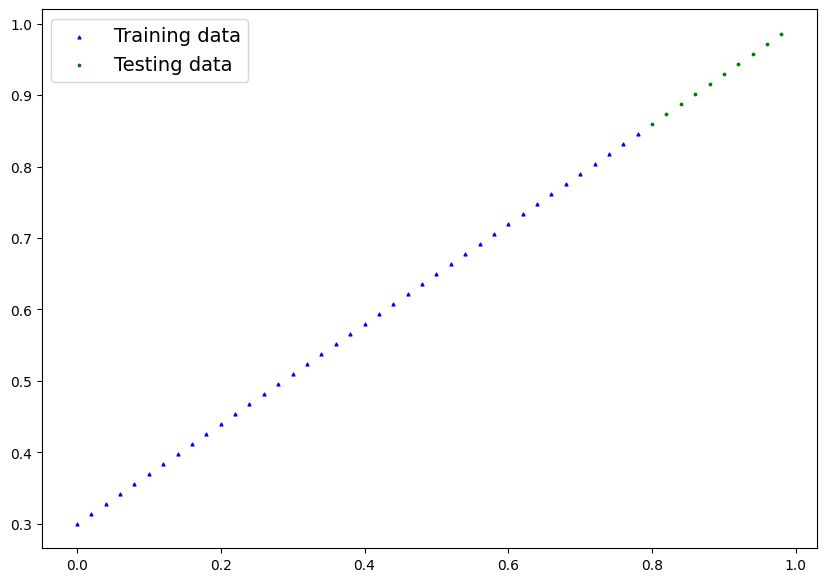

In [ ]:
def plot_predictions(
                    train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None
                    ):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data,train_labels , c="b", marker="^" , s=4 , label= "Training data")
  plt.scatter(test_data , test_labels , c="g" , s=3 , label= "Testing data")
  if predictions is not None:
    plt.plot(test_data , predictions , "r*" , label= "Predictions")
  plt.legend(fontsize=14)


plot_predictions()





##Difference between Plot and Scatter in matplotplyplot

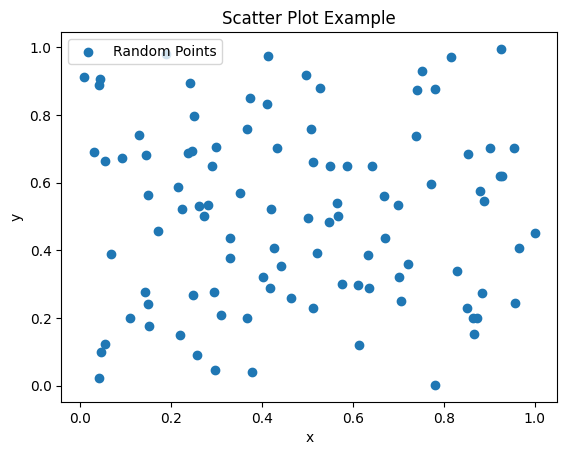

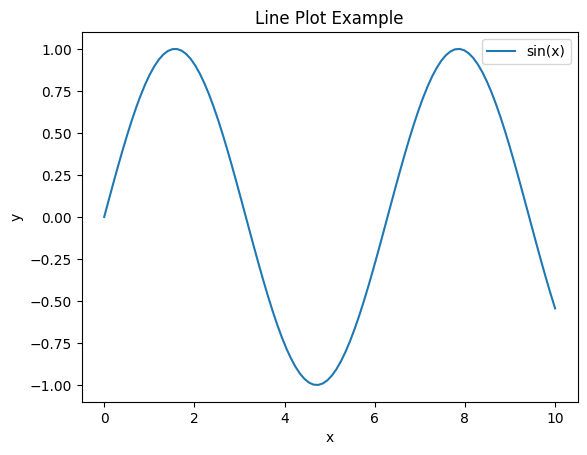

In [ ]:



import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.random.rand(100)
y = np.random.rand(100)

# Create a scatter plot
plt.scatter(x, y, label='Random Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()


# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a line plot
plt.plot(x, y, label='sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot Example')
plt.legend()
plt.show()



##Creating a Model


In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad=True ,
                                              dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype = torch.float ))

  def forward(self, x):
    return self.weights * x + self.bias


##Testing Model


In [ ]:
torch.manual_seed(42)

model = LinearRegressionModel();

#checkOut Parameters
list(model.parameters())
model.state_dict() # It will our model dictoranry of paramaters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

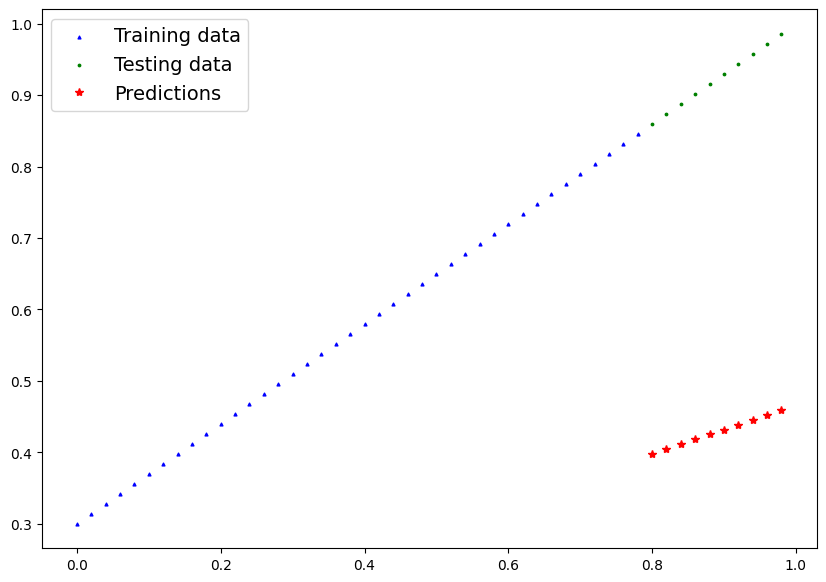

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)
y_preds
plot_predictions(predictions=y_preds)

## Training model

One way to measure how poor model prediction are by using LossFunctions

**Optimizer**  : Takes into account the loss of a model adjust's model parameters(weights, bais )

**Setting Loss Function**

**And Optimzer**

In [ ]:
loss_fn = nn.L1Loss();

optimizer = optim.SGD(params=model.parameters(),
                      lr=0.01)


**Building Training loop**

In [ ]:
with torch.inference_mode():
  print(list(model.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
torch.manual_seed(42)
epochs = 50

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
  model.train()

  #forward pass
  y_pred = model(X_train)
  # loss function mean absoulte error
  loss = loss_fn(y_pred, y_train)
  #optimizer zero grad
  optimizer.zero_grad()
  #backward pass
  loss.backward()
  #optimizer perform step

  optimizer.step()

  # model.eval()


tensor([[0.7784],
        [0.7883],
        [0.7981],
        [0.8079],
        [0.8178],
        [0.8276],
        [0.8375],
        [0.8473],
        [0.8571],
        [0.8670]])


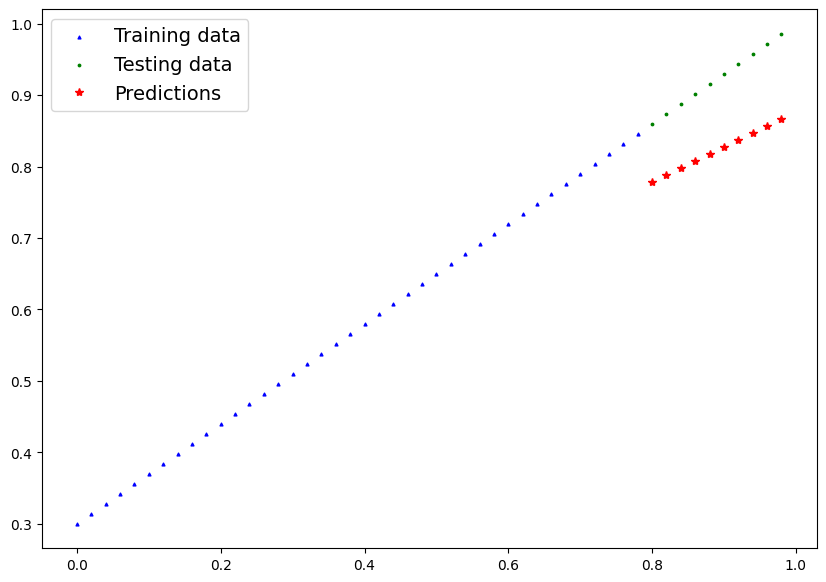

In [ ]:
with torch.inference_mode():
  y_preds_new = model(X_test)
  print(y_preds_new)
  # if epoch % 10 == 0:
plot_predictions(predictions=y_preds_new)



##Saving the Model's Learning

**There are 3 mainly methods**
#1.`torch.save()` allowa to save the PyTorch pickes format
#2.`torch.load()` allows load a saved PyTorch object
#3.`torch.nn.Module.load_state_dict()` to load a model's saved state dict

In [ ]:
#saving the model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)


##Loading PyTorch Model from saved


In [ ]:
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model.state_dict()
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

#Camparing both Models

In [ ]:
model.eval()
loaded_model.eval()

with torch.inference_mode():
  model_preds = model(X_test)
  loaded_model_preds = loaded_model(X_test)
model_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#Putting all Together(Practice)

> Add blockquote



In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
import numpy

<ipython-input-17-2255b30d0ef1>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_predictions(predictions=torch.tensor(y_pred).numpy())


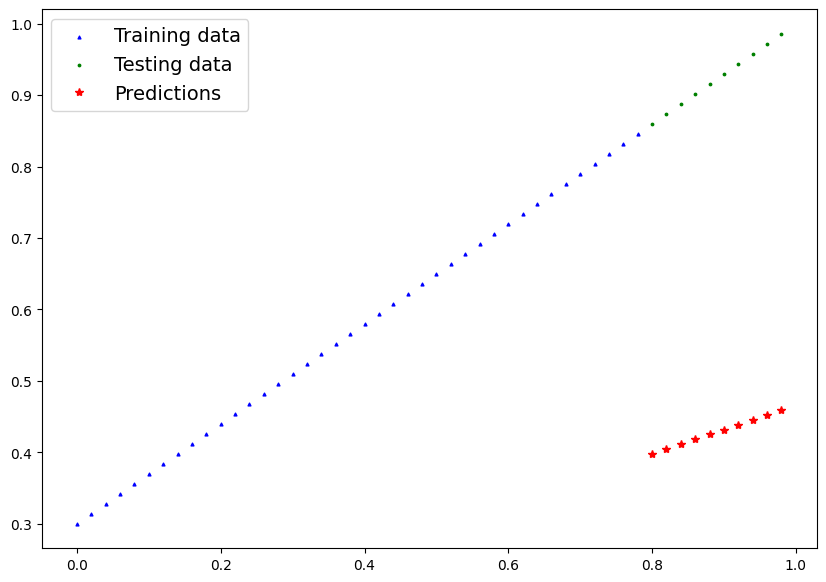

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)

y = weight*(X)+ bias

train_split = int(len(X) * 0.8)

X_train  , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]


class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__(),
    self.weight = nn.Parameter(torch.randn(1 ,
                                           requires_grad=True,
                                           dtype= torch.float))
    self.bias = nn.Parameter(torch.randn(1 ,
                                           requires_grad=True,
                                           dtype= torch.float))
  def forward(self , x ):
    return self.bias + self.weight * x

def plot_predictions(
                    train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None
                    ):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data,train_labels , c="b", marker="^" , s=4 , label= "Training data")
  plt.scatter(test_data , test_labels , c="g" , s=3 , label= "Testing data")
  if predictions is not None:
    plt.plot(test_data , predictions , "r*" , label= "Predictions")
  plt.legend(fontsize=14)

torch.manual_seed(42)

model_test = LinearRegression()

y_pred = model_test(X_test)

plot_predictions(predictions=torch.tensor(y_pred).numpy())


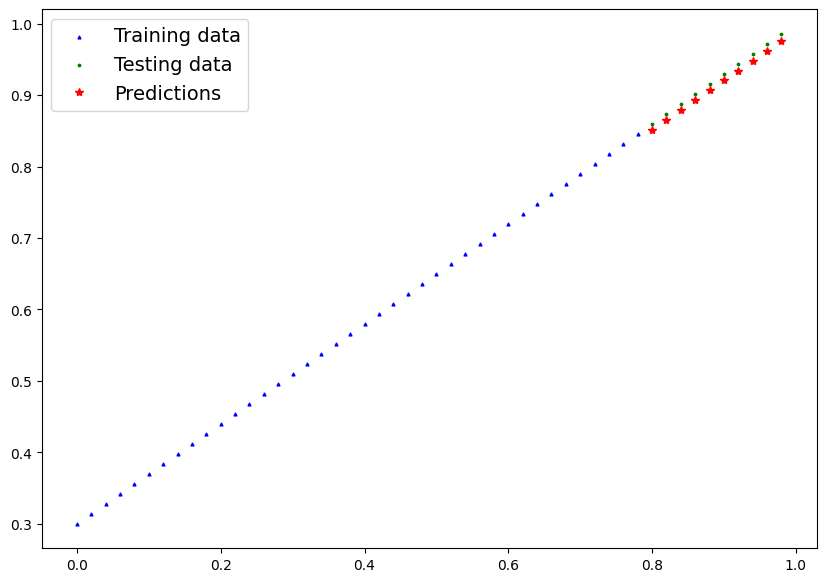

In [ ]:
loss_test = nn.L1Loss()

optimizer = optim.SGD(params=model_test.parameters() ,
                      lr=0.007)

epochs = 100
for epoch in range(epochs):

  model_test.train()

  y_pred = model_test(X_train)

  loss = loss_test(y_pred , y_train)

  optimizer.zero_grad()
  #backward pass
  loss.backward()
  #optimizer perform step
  optimizer.step()

with torch.inference_mode():
  y_pred = model_test(X_test)
plot_predictions(predictions =y_pred)


In [ ]:
from pathlib import Path

MODEL_PATH = Path("models_test")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

NameError: name 'git' is not defined